# Chapter 14: Plotting with a Series

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
url = "http://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make

<ipython-input-2-0baf32d70c1e>:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


## 14.2 The .plot Attribute

In [87]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

alta_df = pd.read_csv(url)

dates = pd.to_datetime(alta_df["DATE"])

In [88]:
snow = (alta_df["SNOW"].rename(dates))

In [ ]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

## 14.3 Histograms

- If we have a continuous numeric data, histogram can give insight into how the data is distributed
- The snow data is heavily skewed. We might want to drop the zero entries.
- We can also change the number of bins

<AxesSubplot: ylabel='Frequency'>

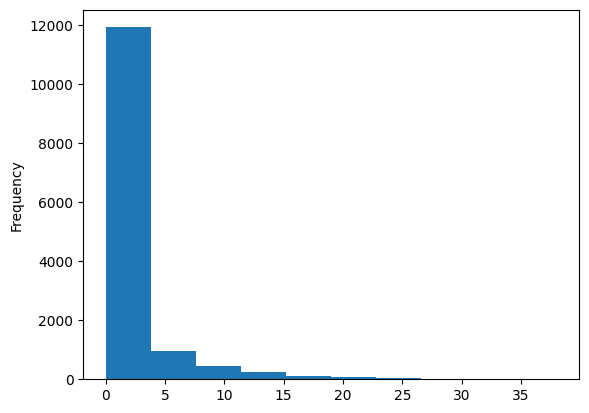

In [ ]:
snow.plot.hist()

<AxesSubplot: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

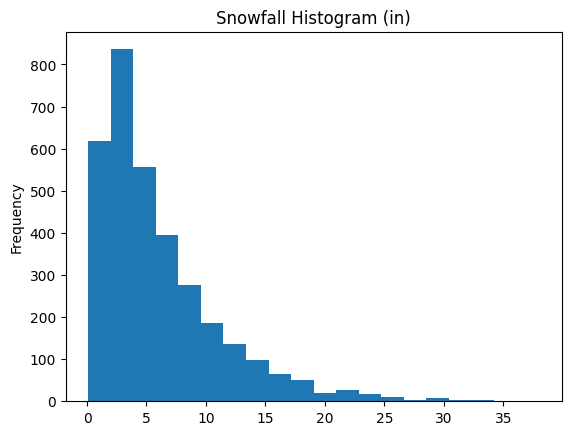

In [ ]:
# change bins
snow[snow>0].plot.hist(bins=20, title="Snowfall Histogram (in)")

## 14.4 Box Plot

<AxesSubplot: >

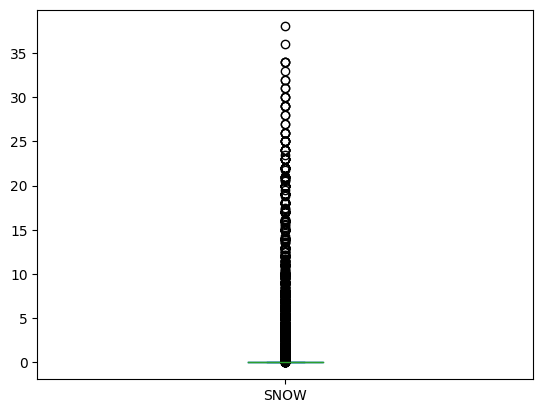

In [ ]:
snow.plot.box()

<AxesSubplot: >

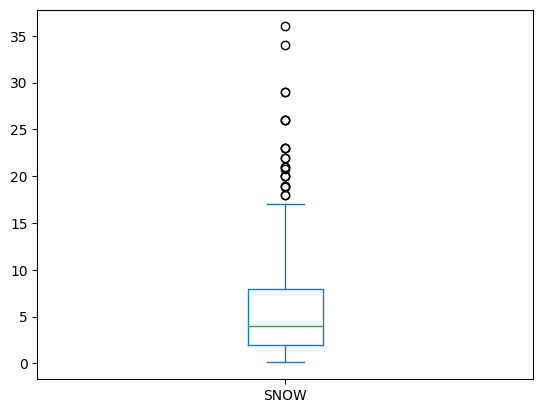

In [ ]:
# limit to snow amounts during January
(snow[lambda s:(s.index.month==1) & (s>0)]
.plot.box())

## 14.5 Kernel Density Estimation Plot

- A smoothed histogram

<AxesSubplot: ylabel='Density'>

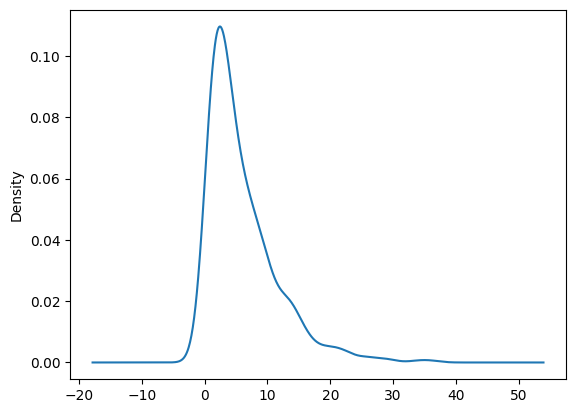

In [ ]:
(snow[lambda s:(s.index.month == 1) & (s>0)]
.plot.kde())

## 14.6 Line Plots

<Axes: >

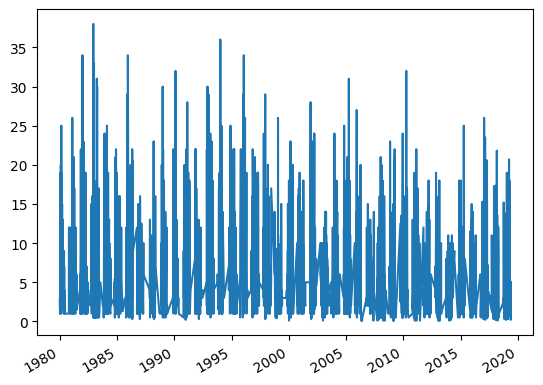

In [7]:
snow[snow>0].plot.line()

<ipython-input-12-8d2501268071>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: >

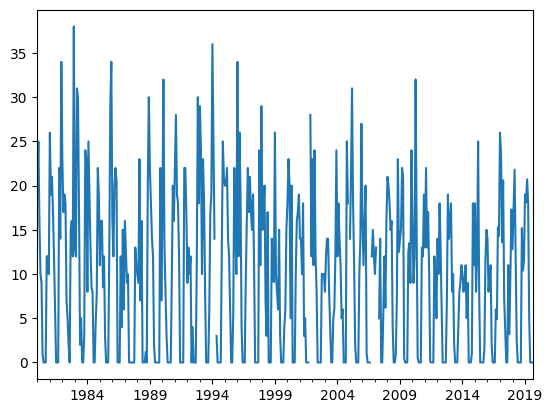

In [12]:
# aggregate at the monthly level
(snow
.resample('ME')
.max().plot.line())

<Axes: >

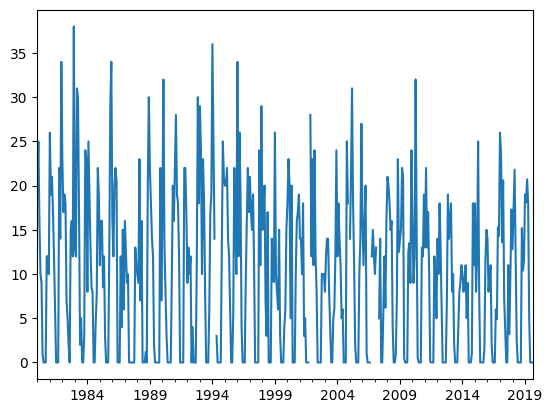

In [14]:
# aggregate at the monthly level
(snow
.resample('ME')
.max().plot.line())

<Axes: >

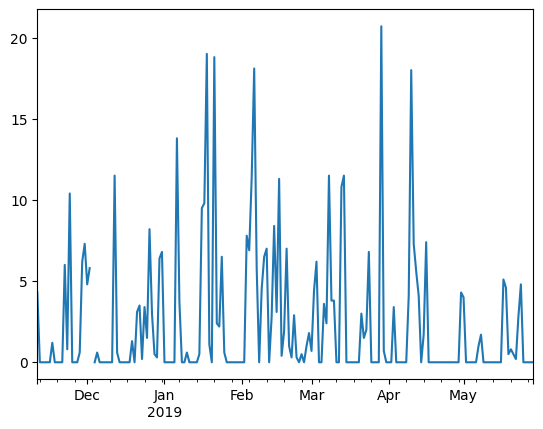

In [17]:
snow.iloc[-300:-100].plot.line()

<ipython-input-8-70917850a5c5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: >

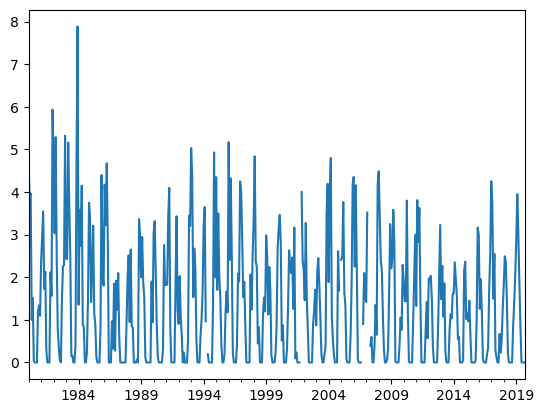

In [8]:
# aggregate at the monthly level
(snow
.resample('M')
.mean()
.plot.line())

<Axes: >

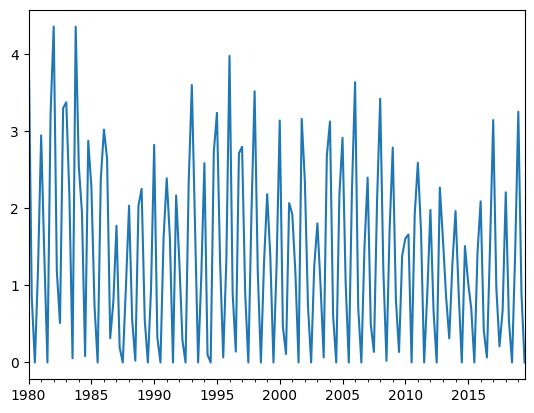

In [21]:
snow.resample('QE').mean().plot.line()

<Axes: >

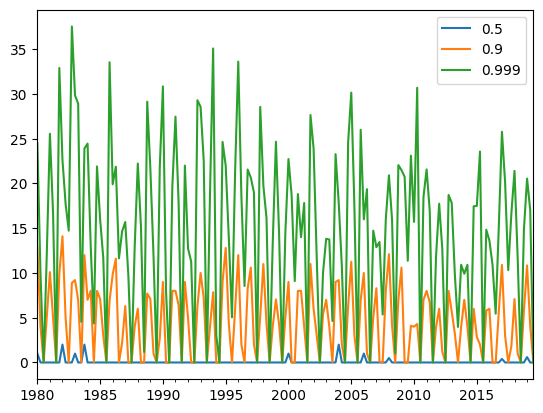

In [27]:
snow. resample('QE').quantile ([.5 , .9, .999]).unstack().plot.line ()

<Axes: >

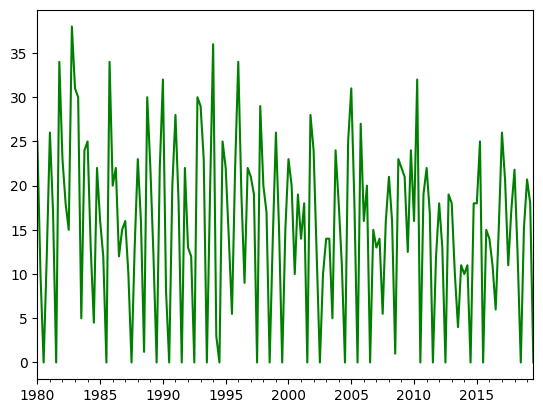

In [28]:
snow. resample('QE').max().plot.line(color='g')

In [34]:
snow.resample('QE').quantile ([.5 , .9, .999])

1980-03-31  0.500     1.000
            0.900    13.000
            0.999    24.550
1980-06-30  0.500     0.000
            0.900     4.000
                      ...  
2019-06-30  0.900     4.100
            0.999    17.046
2019-09-30  0.500     0.000
            0.900     0.000
            0.999     0.000
Name: SNOW, Length: 477, dtype: float64

<Axes: >

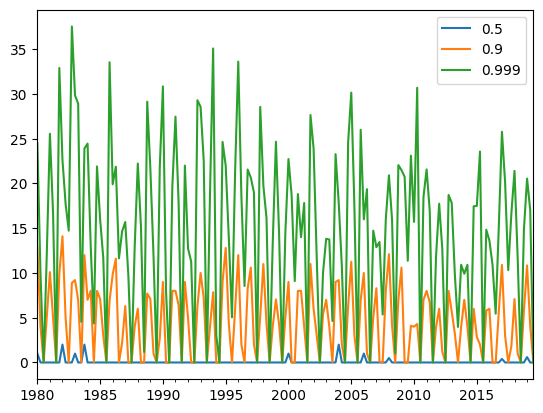

In [32]:
snow. resample('QE').quantile ([.5 , .9, .999]).unstack().plot.line()

In [89]:
s2017 = snow.loc['2016-09':'2017-05']

In [36]:
s2017

,SNOW
2016-09-01,0.0
2016-09-02,0.0
2016-09-03,0.0
2016-09-04,0.0
2016-09-05,0.0
...,...
2017-05-27,0.0
2017-05-28,0.0
2017-05-29,0.0
2017-05-30,0.0


<Axes: ylabel='SNOW'>

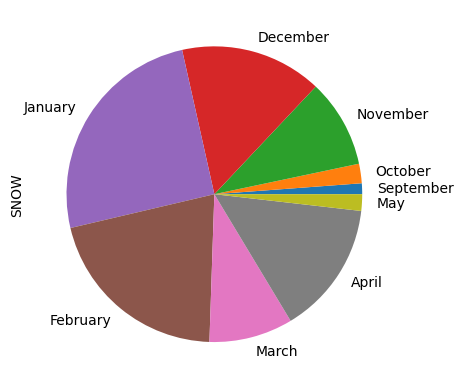

In [91]:
s2017.resample('ME').sum().div(s2017.sum()).mul(100).round(2).rename(lambda index:index.month_name()).plot.pie()

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color_palette = ["#440154" , "#482677" , "#404788" , "#33638d", "#287 d8e",
"#1 f968b", '#29af7f ', '#55c667 ', '#73d055 ', '#b8de29 ', '#fde725 ']
fp = matplotlib.font_manager.FontProperties(fname ='/Fonts/roboto/Roboto-Condensed.ttf ')


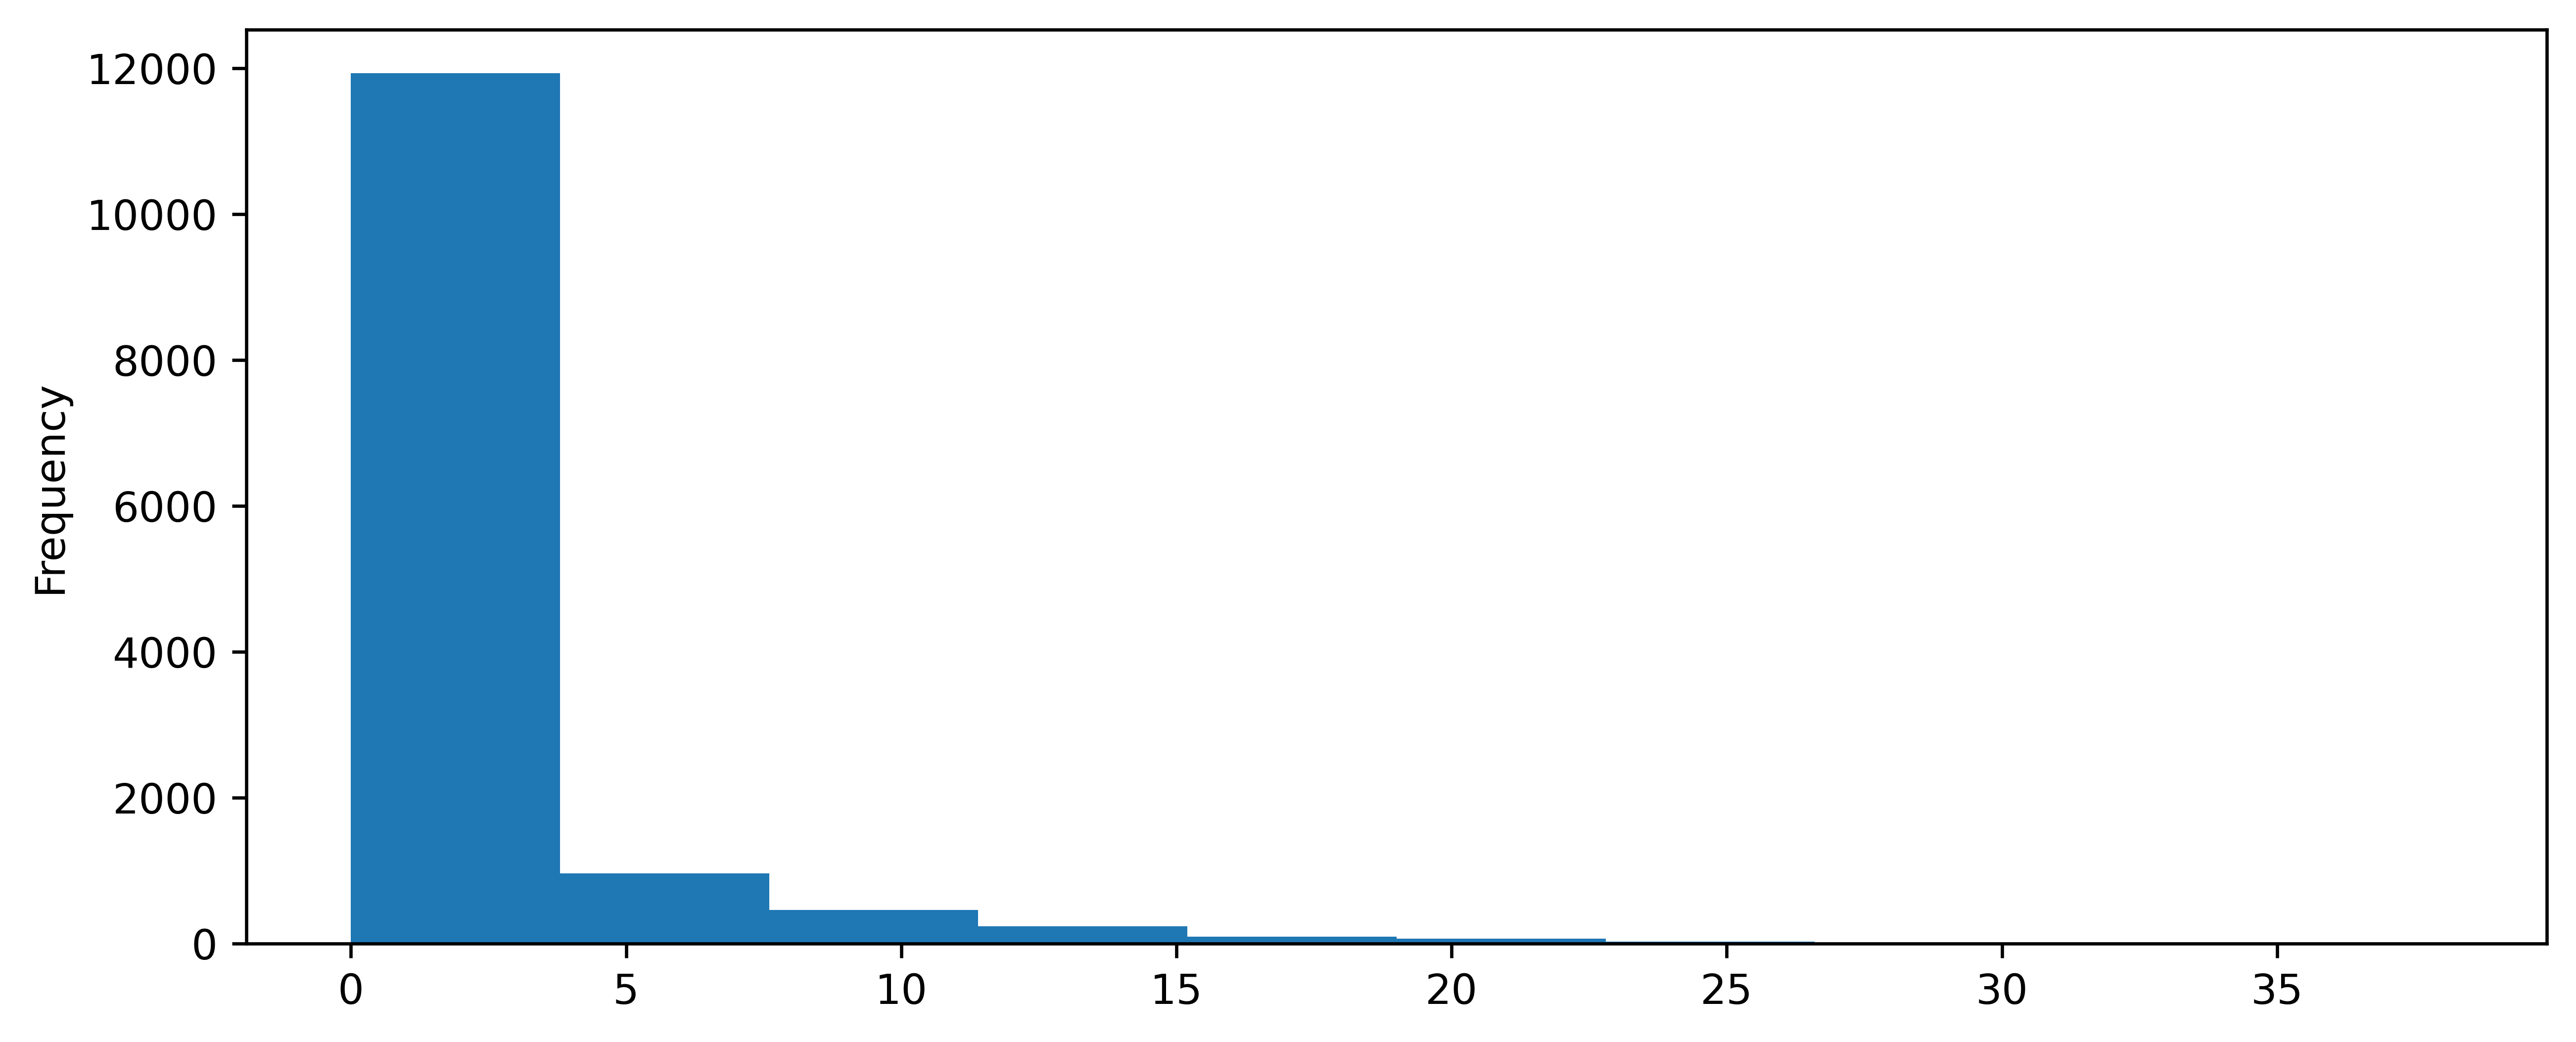

In [102]:
with sns. plotting_context (rc=dict(font='Roboto', palette= color_palette )):
  fig , ax = plt.subplots(dpi =600 , figsize =(10 ,4))
  snow.plot.hist ()
  fig.savefig('snowhist.png', dpi =600 , bbox_inches ='tight')

<Axes: >

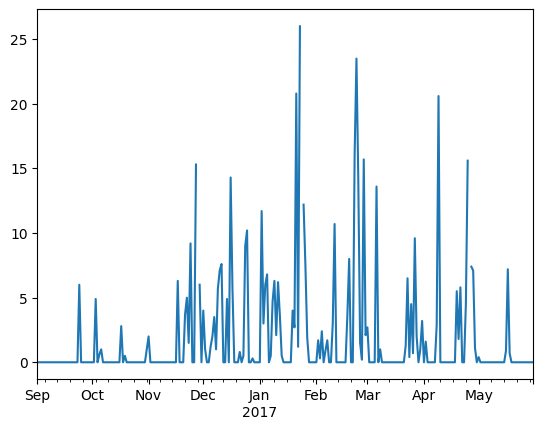

In [37]:
s2017.plot.line()

<Axes: title={'center': '2017 monthly percent of snow fall'}>

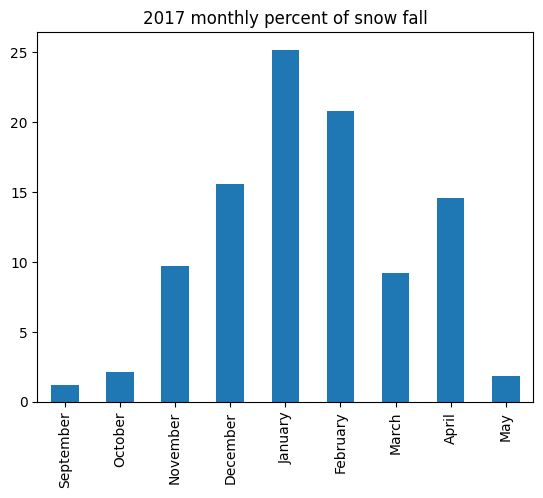

In [52]:
s2017.resample('ME').sum().div(s2017.sum()).mul(100).round(2).rename(lambda idx:idx.month_name()).plot.bar(title = '2017 monthly percent of snow fall')

In [56]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'

In [57]:
df = pd.read_csv(url)

<ipython-input-57-7832ba498456>:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [58]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [59]:
make = df.make

In [60]:
make.value_counts()

,count
make,
Chevrolet,4003
Ford,3371
Dodge,2583
GMC,2494
Toyota,2071
...,...
Volga Associated Automobile,1
Panos,1
Mahindra,1


In [66]:
top10 = make.value_counts().index[:10]

In [70]:
make.value_counts() >100

,count
make,
Chevrolet,True
Ford,True
Dodge,True
GMC,True
Toyota,True
...,...
Volga Associated Automobile,False
Panos,False
Mahindra,False


In [82]:
t = make.value_counts()
print(t)

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64


<Axes: xlabel='make'>

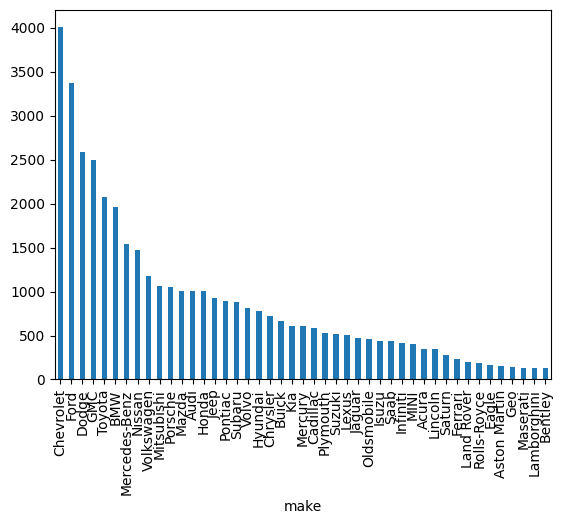

In [86]:
make.value_counts()[make.value_counts() >100].plot.bar()

In [72]:
make.value_counts() >100

,count
make,
Chevrolet,True
Ford,True
Dodge,True
GMC,True
Toyota,True
...,...
Volga Associated Automobile,False
Panos,False
Mahindra,False


In [71]:
make.where(make.isin(top10), 'Other').value_counts()

,count
make,
Other,19400
Chevrolet,4003
Ford,3371
Dodge,2583
GMC,2494
Toyota,2071
BMW,1966
Mercedes-Benz,1538
Nissan,1471


<Axes: xlabel='make'>

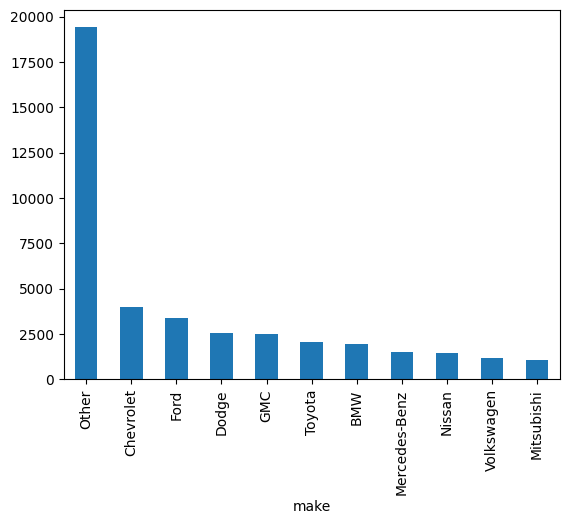

In [69]:
make.where(make.isin(top10), 'Other').value_counts().plot.bar()

In [44]:
s2017.index.month_name()

Index(['September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       ...
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May'],
      dtype='object', length=273)

## 14.7 Line Plots with Multiple Aggregations

<AxesSubplot: >

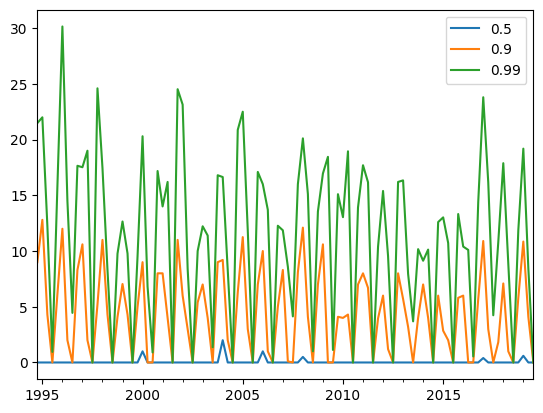

In [ ]:
(snow
.resample('Q')
.quantile([.5, .9, .99])
.unstack()
.iloc[-100:]
.plot.line())

## 14.8 Bar Plots

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}>

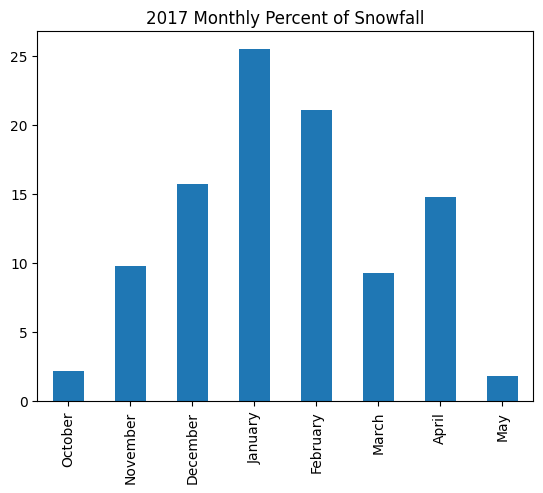

In [ ]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.bar(title="2017 Monthly Percent of Snowfall"))

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}>

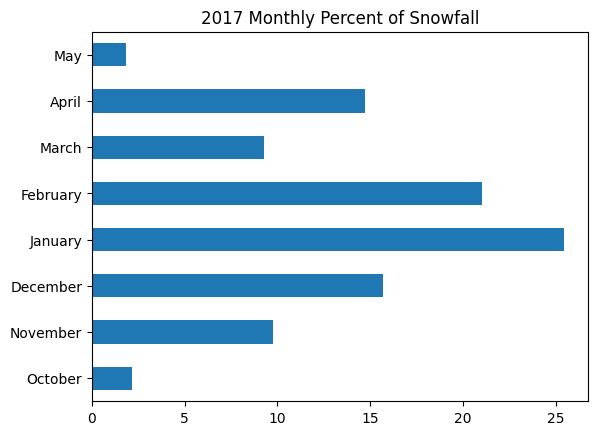

In [ ]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.barh(title="2017 Monthly Percent of Snowfall"))

- If more than 30 bars, not a good idea to use bar plot

<AxesSubplot: >

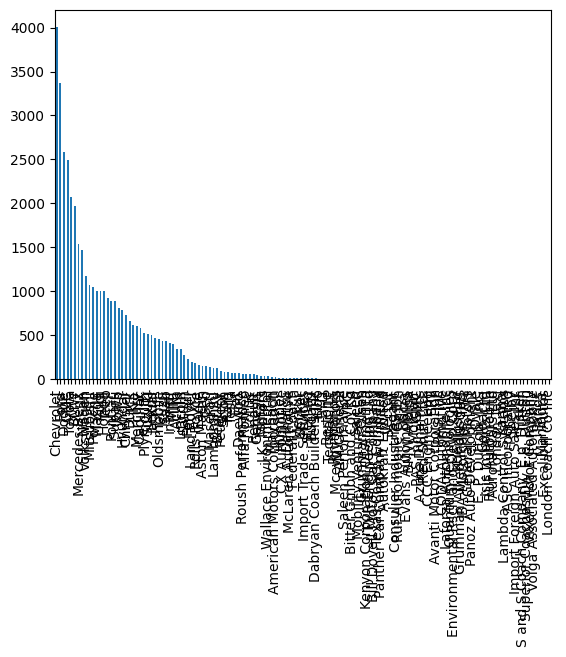

In [ ]:
make.value_counts().plot.bar()

<AxesSubplot: >

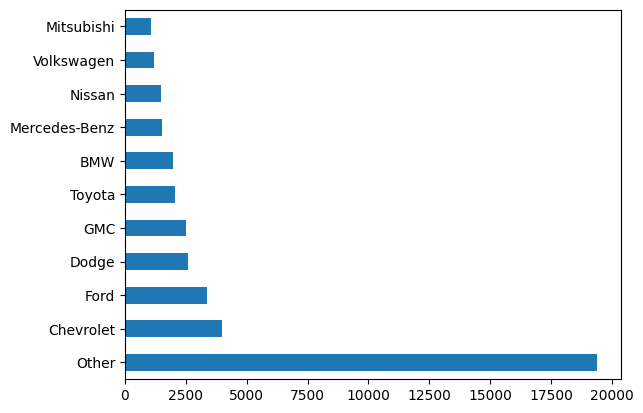

In [ ]:
# limit to 10
top10 = make.value_counts().index[:10]
(make
.where(make.isin(top10), 'Other')
.value_counts()
.plot.barh())

## 14.9 Pie Plots

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

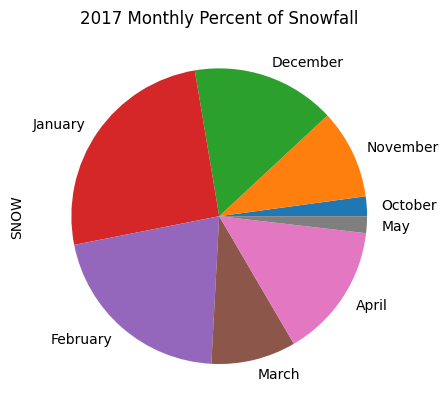

In [ ]:
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.pie(title="2017 Monthly Percent of Snowfall"))

## 14.10 Styling

In [ ]:
import matplotlib
import seaborn as sns
color_palette = ['#440154', '#482677', '#404788', '#33638d', '#287d8e', '#1f968b', '#29af7f', '#55c667', '#73d055', '#b8de29', '#fde725']

In [ ]:
fp = matplotlib.font_manager.FontProperties(
    fname='/Fonts/roboto/Roboto-Condensed.ttf')